<a href="https://colab.research.google.com/github/Its-suLav-D/CSE450/blob/main/DeepBike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras-tuner 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
url='https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv'
bike_df = pd.read_csv(url)
bike_df.sample(10) 

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered
3849,6/14/11,2,7,0,1,1,0.52,28,18.32,18.9998,19,346
41,1/2/11,1,18,0,0,2,0.46,22,8.92,5.9978,10,43
3344,5/24/11,2,6,0,1,2,0.94,13,19.26,20.0030,10,102
11100,4/12/12,2,17,0,1,1,0.27,26,15.50,15.9968,60,596
7007,10/24/11,4,14,0,1,2,0.64,13,17.38,18.0032,63,143
2870,5/4/11,2,12,0,1,2,0.62,24,12.68,13.0004,19,105
6107,9/17/11,3,1,0,0,1,0.72,7,13.62,13.9970,28,52
5514,8/22/11,3,16,0,1,1,0.30,26,26.78,26.9990,66,254
10863,4/2/12,2,19,0,1,1,0.27,17,15.50,15.9968,66,428
14471,8/31/12,3,4,0,1,1,0.89,9,22.08,22.0028,0,7


In [ ]:
numerical_features = ['temp_c', 'hr', 'hum', 'windspeed', 'feels_like_c']


In [ ]:
# normalize numerical features

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
bike_df[numerical_features] = scaler.fit_transform(bike_df[numerical_features])

bike_df.sample(10)

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered
4608,7/15/11,3,0.956522,0,1,1,0.57,0.263158,0.653061,0.6212,71,152
418,1/19/11,1,0.478261,0,1,2,0.87,0.105263,0.265306,0.3030,5,47
9135,1/21/12,1,0.565217,0,0,2,0.80,0.298246,0.183673,0.1970,10,66
1430,3/4/11,1,0.913043,0,1,2,0.70,0.263158,0.285714,0.2879,6,64
8078,12/8/11,4,0.260870,0,1,1,0.55,0.333333,0.204082,0.2121,0,71
735,2/3/11,1,0.000000,0,1,1,0.40,0.526316,0.183673,0.1667,1,11
1621,3/13/11,1,0.043478,0,0,1,0.66,0.157895,0.346939,0.3485,10,23
5276,8/12/11,3,0.782609,0,1,1,0.40,0.350877,0.755102,0.6818,89,376
10909,4/4/12,2,0.739130,0,1,1,0.41,0.350877,0.653061,0.6212,99,645
15412,10/9/12,4,0.391304,0,1,2,0.77,0.263158,0.408163,0.4242,37,345


In [ ]:
cat_features = ['season', 'weathersit', 'workingday', 'holiday']

X = bike_df[numerical_features + cat_features]

X.sample(10)

,temp_c,hr,hum,windspeed,feels_like_c,season,weathersit,workingday,holiday
11538,0.510204,1.000000,0.55,0.263158,0.5000,2,2,1,0
10225,0.285714,0.130435,0.56,0.421053,0.2727,1,1,1,0
11352,0.285714,0.217391,0.81,0.333333,0.2879,2,3,1,0
717,0.204082,0.260870,0.93,0.122807,0.2424,1,3,1,0
14958,0.612245,0.478261,0.43,0.000000,0.6212,3,1,1,0
2627,0.551020,0.391304,0.88,0.298246,0.5303,2,1,0,0
12484,0.632653,0.391304,0.57,0.192982,0.6212,2,1,0,0
2842,0.551020,0.347826,0.83,0.333333,0.5303,2,2,1,0
10811,0.489796,0.608696,0.63,0.298246,0.4848,2,2,0,0
9870,0.204082,0.304348,0.64,0.000000,0.2727,1,1,1,0


In [ ]:
X.sample(10)

,temp_c,hr,hum,windspeed,feels_like_c,season,weathersit,workingday,holiday
13052,0.714286,0.043478,0.58,0.000000,0.6667,3,1,1,0
4740,0.816327,0.434783,0.71,0.263158,0.8636,3,2,1,0
3837,0.653061,0.826087,0.39,0.333333,0.6212,2,1,1,0
2491,0.571429,0.739130,0.49,0.333333,0.5455,2,1,1,0
16570,0.244898,0.173913,0.70,0.228070,0.2576,4,2,1,0
13447,0.836735,0.521739,0.49,0.333333,0.7879,3,1,1,0
14090,0.653061,0.304348,0.69,0.228070,0.6212,3,2,1,0
3398,0.775510,0.521739,0.59,0.385965,0.7424,2,1,1,0
9702,0.244898,0.217391,0.65,0.122807,0.2727,1,2,1,0
6502,0.387755,0.521739,0.71,0.157895,0.4091,4,2,1,0


In [ ]:
Y = bike_df[['registered', 'casual']]
Y.head() 

,registered,casual
0,13,3
1,32,8
2,27,5
3,10,3
4,1,0


In [ ]:
# Split the data into training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)


In [ ]:
X_train.shape[1]

9

In [ ]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
import kerastuner as kt


<ipython-input-11-1334fd786eaf>:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [ ]:
def build_model(hp):
  model = keras.Sequential()

  model.add(layers.Dense(units=hp.Int('units_input', min_value=32, max_value=512, step=32),
                           input_dim=X.shape[1],
                           activation='relu'))
    # Add hidden layers
  for i in range(hp.Int('num_layers', 2, 10)):
      model.add(layers.Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                               activation='relu',
                               kernel_regularizer=keras.regularizers.l2(hp.Choice('l2', values=[1e-1, 1e-2, 1e-3]))))
      if i % 2 == 0:
        model.add(layers.BatchNormalization())
      model.add(layers.Dropout(rate=hp.Float('rate_' + str(i),
                                              min_value=0,
                                              max_value=0.5,
                                              step=0.1)))
      # Add output layer
  model.add(layers.Dense(2, activation='linear'))


      # Compile model
  model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='mean_squared_error',
        metrics=['mean_squared_error', 'mean_absolute_error'])
  return model



In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    directory='my_dir',
    project_name='bike_rental9')

In [ ]:
tuner.search(X_train, Y_train, epochs=3, validation_data=(X_test, Y_test))

Trial 5 Complete [00h 00m 44s]
val_loss: 23094.185546875

Best val_loss So Far: 5016.64013671875
Total elapsed time: 00h 02m 38s


In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]

In [ ]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 416)               4160      
                                                                 
 dense_1 (Dense)             (None, 416)               173472    
                                                                 
 batch_normalization (BatchN  (None, 416)              1664      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 416)               0         
                                                                 
 dense_2 (Dense)             (None, 480)               200160    
                                                                 
 dropout_1 (Dropout)         (None, 480)               0         
                                                        

In [ ]:
from keras.callbacks import Callback

class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []

    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))

# Create an instance of the LossHistory callback
history = LossHistory()


In [ ]:
best_model.fit(X_train, Y_train, batch_size=32, epochs=200, initial_epoch=4, validation_data=(X_test, Y_test), callbacks=[history])

Epoch 5/200
416/416 [==============================] - 8s 15ms/step - loss: 4967.4961 - mean_squared_error: 4946.4893 - mean_absolute_error: 39.7500 - val_loss: 4064.6553 - val_mean_squared_error: 4042.3401 - val_mean_absolute_error: 36.3576
Epoch 6/200
416/416 [==============================] - 7s 17ms/step - loss: 4401.9209 - mean_squared_error: 4378.5122 - mean_absolute_error: 37.4277 - val_loss: 4376.5146 - val_mean_squared_error: 4352.0420 - val_mean_absolute_error: 38.6409
Epoch 7/200
416/416 [==============================] - 7s 16ms/step - loss: 4037.8032 - mean_squared_error: 4012.7397 - mean_absolute_error: 36.2881 - val_loss: 3624.8176 - val_mean_squared_error: 3599.2632 - val_mean_absolute_error: 33.1634
Epoch 8/200
416/416 [==============================] - 8s 20ms/step - loss: 3685.1541 - mean_squared_error: 3658.9143 - mean_absolute_error: 34.8493 - val_loss: 3246.9722 - val_mean_squared_error: 3220.2275 - val_mean_absolute_error: 33.4081
Epoch 9/200
416/416 [===========

In [ ]:
from sklearn.metrics import r2_score

y_pred = best_model.predict(X_test)

registered_predictions = y_pred[:, 0]
casual_predictions = y_pred[:, 1]


# # compute the r2 score for "casual" and "registered"
casual_r2_score = r2_score(Y_test.iloc[:, 1], casual_predictions)
registered_r2_score = r2_score(Y_test.iloc[:, 0], registered_predictions)

print("R2 score for 'casual': {:.4f}".format(casual_r2_score))
print("R2 score for 'registered': {:.4f}".format(registered_r2_score))


104/104 [==============================] - 1s 3ms/step
R2 score for 'casual': 0.8420
R2 score for 'registered': 0.8449


In [ ]:
registered_predictions

array([132.63536, 325.17505, 274.40912, ..., 131.31195, 113.49103,
       260.72852], dtype=float32)

In [ ]:
Y_test.iloc[:, 0]

15206    223
12731    286
11145    372
3828      80
272       82
        ... 
2868      26
2016      75
4873      71
15073    189
12509    265
Name: registered, Length: 3328, dtype: int64

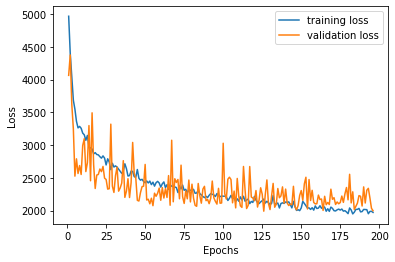

In [ ]:
# plot training and validation losses over epochs
plt.plot(range(1, len(history.losses)+1), history.losses, label='training loss')
plt.plot(range(1, len(history.val_losses)+1), history.val_losses, label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

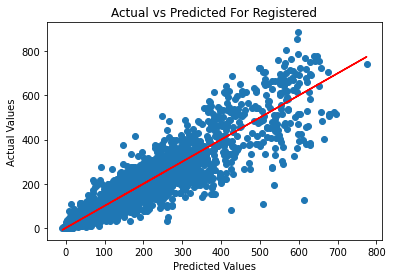

In [ ]:
# Create a scatter plot of y_predict vs y_test
plt.scatter(registered_predictions, Y_test.iloc[:, 0])

plt.plot(registered_predictions, registered_predictions, color='red')

# Label the plot
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs Predicted For Registered')

# Show the plot
plt.show()


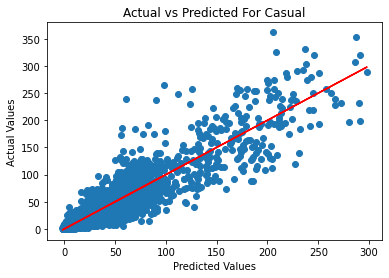

In [ ]:
# Create a scatter plot of y_predict vs y_test
plt.scatter(casual_predictions, Y_test.iloc[:, 1])

plt.plot(casual_predictions, casual_predictions, color='red')

# Label the plot
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs Predicted For Casual')

# Show the plot
plt.show()


In [ ]:
# Pre-Process the Data 

In [ ]:
bike_holdout = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes_december.csv')
bike_holdout.sample(10)

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c
55,12/3/12,4,7,0,1,2,0.93,0,7.98,7.9976
142,12/6/12,4,22,0,1,1,0.65,11,3.28,-0.0016
300,12/13/12,4,12,0,1,1,0.40,17,8.92,5.9978
604,12/26/12,1,6,0,1,2,0.69,15,2.34,-2.0014
223,12/10/12,4,7,0,1,2,0.94,17,9.86,9.9974
669,12/28/12,1,23,0,1,2,0.65,6,3.28,1.0016
285,12/12/12,4,21,0,1,2,0.52,17,6.10,3.0014
8,12/1/12,4,8,0,0,2,0.87,9,3.28,-0.0016
436,12/19/12,4,4,0,1,1,0.75,9,3.28,-0.0016
234,12/10/12,4,18,0,1,2,0.88,19,13.62,13.9970


In [ ]:
bike_holdout.shape

(742, 10)

In [ ]:
scaler = MinMaxScaler()
bike_holdout[numerical_features] = scaler.fit_transform(bike_holdout[numerical_features])

bike_holdout.sample(10)

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c
18,12/1/12,4,0.782609,0,0,2,0.652174,0.000000,0.434783,0.451565
289,12/13/12,4,0.043478,0,1,2,0.304348,0.431818,0.304348,0.225889
148,12/7/12,4,0.173913,0,1,1,0.637681,0.159091,0.260870,0.258037
670,12/29/12,1,0.000000,0,0,2,0.565217,0.000000,0.217391,0.193528
374,12/16/12,4,0.608696,0,0,2,0.652174,0.204545,0.521739,0.516074
461,12/20/12,4,0.217391,0,1,2,0.565217,0.159091,0.347826,0.354907
479,12/20/12,4,1.000000,0,1,3,0.739130,0.454545,0.565217,0.548435
270,12/12/12,4,0.260870,0,1,2,0.420290,0.386364,0.260870,0.193528
109,12/5/12,4,0.565217,0,1,1,0.144928,0.431818,0.695652,0.645093
496,12/21/12,1,0.695652,0,1,2,0.115942,0.500000,0.347826,0.258037


In [ ]:

X_holdout= bike_holdout[numerical_features + cat_features]

X_holdout.sample(10)

,temp_c,hr,hum,windspeed,feels_like_c,season,weathersit,workingday,holiday
252,0.478261,0.521739,0.318841,0.681818,0.354907,4,2,1,0
672,0.217391,0.086957,0.565217,0.000000,0.193528,1,2,0,0
366,0.434783,0.260870,0.811594,0.000000,0.451565,4,2,0,0
499,0.304348,0.826087,0.202899,0.454545,0.225889,1,1,1,0
710,0.304348,0.695652,0.101449,0.636364,0.193528,1,1,0,0
675,0.217391,0.217391,0.637681,0.136364,0.193528,1,2,0,0
264,0.347826,0.000000,0.304348,0.250000,0.322546,4,1,1,0
83,0.739130,0.478261,0.666667,0.295455,0.677454,4,1,1,0
400,0.565217,0.695652,0.913043,0.386364,0.548435,4,3,1,0
540,0.347826,0.521739,0.159420,0.295455,0.290398,1,1,0,0


In [ ]:
y_pred_holdout = best_model.predict(X_holdout)

registered_predictions_holdout = y_pred_holdout[:, 0]
casual_predictions_holdout = y_pred_holdout[:, 1]


24/24 [==============================] - 0s 4ms/step


In [ ]:
predictions_df = pd.DataFrame({'casual_predictions': casual_predictions_holdout,
                               'registered_predictions': registered_predictions_holdout})

predictions_df['casual_predictions'] = np.ceil(predictions_df['casual_predictions'])
predictions_df['registered_predictions'] = np.ceil(predictions_df['registered_predictions'])

predictions_df


,casual_predictions,registered_predictions
0,14.0,71.0
1,13.0,61.0
2,7.0,37.0
3,4.0,16.0
4,2.0,4.0
...,...,...
737,9.0,188.0
738,6.0,118.0
739,5.0,80.0
740,4.0,63.0


In [ ]:
predictions_df.to_csv('team2-module-4-predictions.csv')

In [ ]:
# Another 

In [ ]:
# def build_model_test():
#     model = keras.Sequential([
#         layers.Dense(32, activation='relu', input_shape=[len(X_train.keys())]),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(1)
#     ])
    
#     optimizer = tf.keras.optimizers.Adam(0.001)
    
#     model.compile(loss='mse',
#                     optimizer=optimizer,
#                     metrics=['mae', 'mse'])
#     return model


In [ ]:
# model_relu = build_model_test()
# model_relu.summary()
# # 

In [ ]:
# num_epochs = 1000

# history_relu = model_relu.fit(
#     X_train, Y_train,
#     epochs=num_epochs, validation_split = 0.2, verbose=True)


In [ ]:
# y_pred_relu = model_relu.predict(X_test).flatten()

In [ ]:
# y_pred_relu

In [ ]:
# Y_test

In [ ]:
# r2_score(y_pred_relu, Y_test)